In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [32]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:/Users/acer/Desktop/Brain Tumor/folderPath/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/acer/Desktop/Brain Tumor/folderPath/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [33]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.1,random_state = 101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)




In [34]:

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_train_new
y_test = tf.keras.utils.to_categorical(y_test)

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
    
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))     
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))      
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))      
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

In [36]:
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [37]:
model.save("tumor.h5")


In [38]:
from keras.models import load_model


In [39]:
keras_model = load_model('tumor.h5')

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 

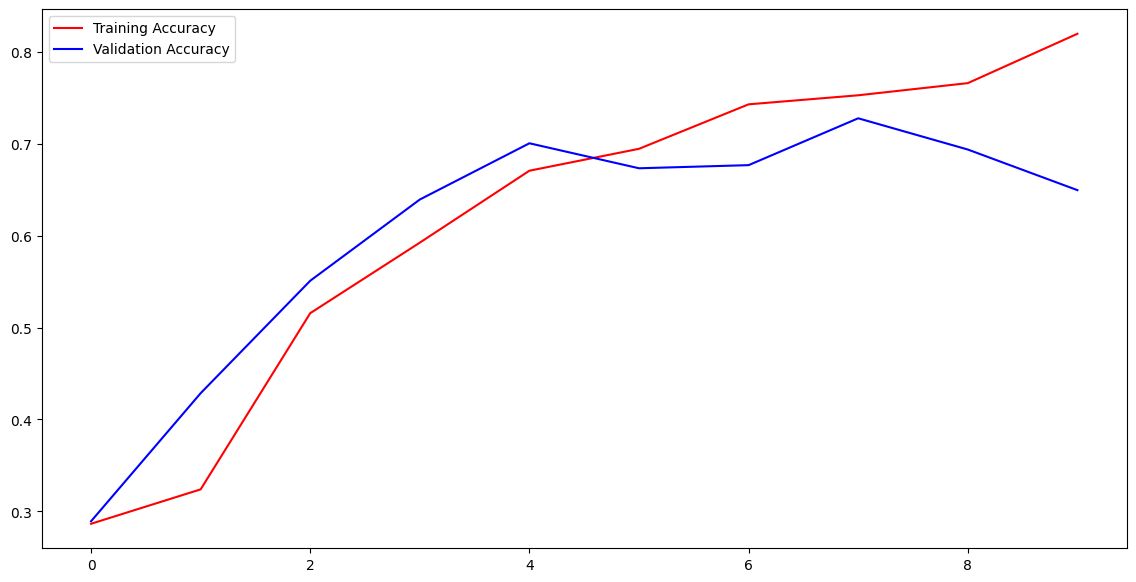

In [42]:
#model.save("brain.h5")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

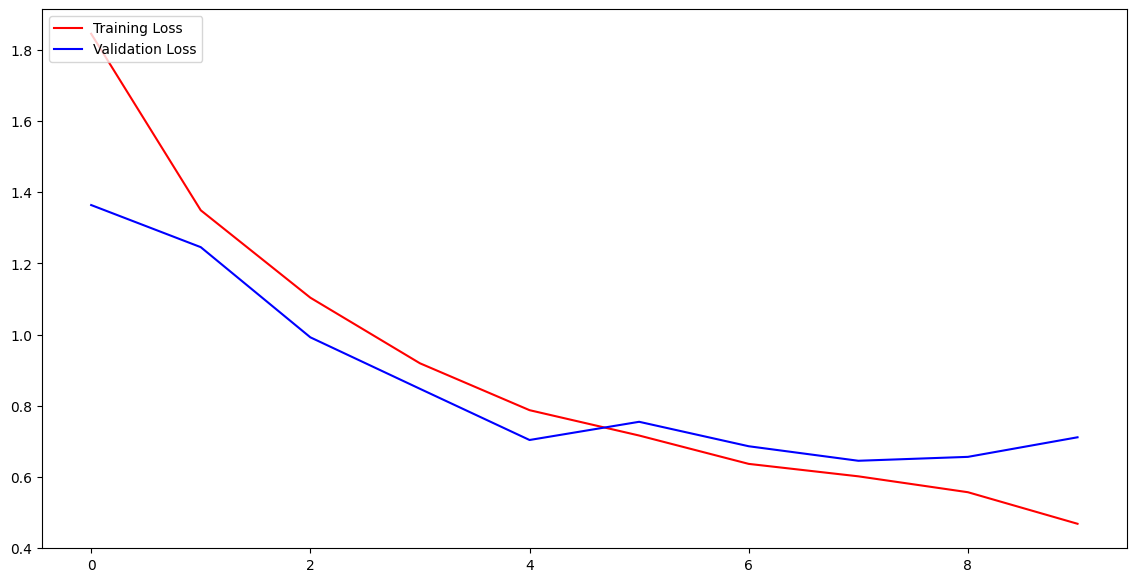

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

Prediction
